In [22]:
import numpy as np
import pandas as pd
import glob
import os
import librosa

In [23]:
INPUT_DIR="C:\\Users\\senthilku\\Desktop\\Heart Sound"
SAMPLE_RATE = 16000
MAX_SOUND_CLIP_DURATION=12 #sec  

In [24]:
set_a=pd.read_csv(INPUT_DIR+"/set_a.csv")
#set_a_timing=pd.read_csv(INPUT_DIR+"/set_a_timing.csv")
set_b=pd.read_csv(INPUT_DIR+"/set_b.csv")
frames = [set_a, set_b]
data_ab=pd.concat(frames)

In [25]:
def audio_norm(data):
    max_data = np.max(data)
    min_data = np.min(data)
    data = (data-min_data)/(max_data-min_data+0.0001)
    return data-0.5

# get audio data without padding highest quality audio
def load_file_data_without_change(folder,file_names, duration=3, sr=16000):
    input_length=sr*duration
    # function to load files and extract features
    # file_names = glob.glob(os.path.join(folder, '*.wav'))
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            # use kaiser_fast technique for faster extraction
            X, sr = librosa.load( sound_file, res_type='kaiser_fast') 
            dur = librosa.get_duration(y=X, sr=sr)
            # extract normalized mfcc feature from data
            #mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40).T,axis=0) 
        except Exception as e:
            print("Error encountered while parsing file: ", file)
        #feature = np.array(mfccs).reshape([-1,1])
        data.append(X)
    return data


# get audio data with a fix padding may also chop off some file
def load_file_data (folder,file_names, duration=12, sr=16000):
    input_length=sr*duration
    # function to load files and extract features
    # file_names = glob.glob(os.path.join(folder, '*.wav'))
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            # use kaiser_fast technique for faster extraction
            X, sr = librosa.load( sound_file, sr=sr, duration=duration,res_type='kaiser_fast') 
            dur = librosa.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if (round(dur) < duration):
                print ("fixing audio lenght :", file_name)
                y = librosa.util.fix_length(X, input_length)                
            #normalized raw audio 
            y = audio_norm(y)            
            # extract normalized mfcc feature from data
            #mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40).T,axis=0)             
        except Exception as e:
            print("Error encountered while parsing file: ", file)        
        #feature = np.array(mfccs).reshape([-1,1])
        data.append(y)
    return data

In [26]:
# simple encoding of categories, limited to 3 types
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Map label text to integer
CLASSES = ['artifact','murmur','normal']
# {'artifact': 0, 'murmur': 1, 'normal': 3}
NB_CLASSES=len(CLASSES)

# Map integer value to text labels
label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)
print (" ")
# map integer to label text
int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'artifact': 0, 'murmur': 1, 'normal': 2}
 
{0: 'artifact', 1: 'murmur', 2: 'normal'}


In [27]:
# load dataset-a, keep them separate for testing purpose
import os, fnmatch

A_folder=INPUT_DIR+'/set_a/'
# set-a
A_artifact_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'artifact*.wav')
A_artifact_sounds = load_file_data(folder=A_folder,file_names=A_artifact_files, duration=MAX_SOUND_CLIP_DURATION)
A_artifact_labels = [0 for items in A_artifact_files]

A_normal_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'normal*.wav')
A_normal_sounds = load_file_data(folder=A_folder,file_names=A_normal_files, duration=MAX_SOUND_CLIP_DURATION)
A_normal_labels = [2 for items in A_normal_sounds]

A_extrahls_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'extrahls*.wav')
A_extrahls_sounds = load_file_data(folder=A_folder,file_names=A_extrahls_files, duration=MAX_SOUND_CLIP_DURATION)
A_extrahls_labels = [1 for items in A_extrahls_sounds]

A_murmur_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'murmur*.wav')
A_murmur_sounds = load_file_data(folder=A_folder,file_names=A_murmur_files, duration=MAX_SOUND_CLIP_DURATION)
A_murmur_labels = [1 for items in A_murmur_files]

# test files
A_unlabelledtest_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'Aunlabelledtest*.wav')
A_unlabelledtest_sounds = load_file_data(folder=A_folder,file_names=A_unlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
A_unlabelledtest_labels = [-1 for items in A_unlabelledtest_sounds]

print ("loaded dataset-a")

load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/artifact__201012172012.wav
fixing audio lenght : artifact__201012172012.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/artifact__201105040918.wav
fixing audio lenght : artifact__201105040918.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/artifact__201105041959.wav
fixing audio lenght : artifact__201105041959.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/artifact__201105051017.wav
fixing audio lenght : artifact__201105051017.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/artifact__201105060108.wav
fixing audio lenght : artifact__201105060108.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/artifact__201105061143.wav
fixing audio lenght : artifact__201105061143.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/artifact__201105190800.wav
fixing audio lenght : artifact__201105190800.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/artifact__2011052808

fixing audio lenght : normal__201106221418.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/normal__201106221450.wav
fixing audio lenght : normal__201106221450.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/normal__201108011112.wav
fixing audio lenght : normal__201108011112.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/normal__201108011114.wav
fixing audio lenght : normal__201108011114.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/normal__201108011115.wav
fixing audio lenght : normal__201108011115.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/normal__201108011118.wav
fixing audio lenght : normal__201108011118.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/extrahls__201101070953.wav
fixing audio lenght : extrahls__201101070953.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/extrahls__201101091153.wav
fixing audio lenght : extrahls__201101091153.wav
load file  C:\Users\senthilku\Desktop\Heart Sound

fixing audio lenght : Aunlabelledtest__201101152256.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/Aunlabelledtest__201101220549.wav
fixing audio lenght : Aunlabelledtest__201101220549.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/Aunlabelledtest__201101241434.wav
fixing audio lenght : Aunlabelledtest__201101241434.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/Aunlabelledtest__201102081033.wav
fixing audio lenght : Aunlabelledtest__201102081033.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/Aunlabelledtest__201102081045.wav
fixing audio lenght : Aunlabelledtest__201102081045.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/Aunlabelledtest__201102200848.wav
fixing audio lenght : Aunlabelledtest__201102200848.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/Aunlabelledtest__201103011036.wav
fixing audio lenght : Aunlabelledtest__201103011036.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/Aunlabelledt

In [28]:
# load dataset-b, keep them separate for testing purpose 
B_folder=INPUT_DIR+'/set_b/'
# set-b
B_normal_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'normal*.wav')  # include noisy files
B_normal_sounds = load_file_data(folder=B_folder,file_names=B_normal_files, duration=MAX_SOUND_CLIP_DURATION)
B_normal_labels = [2 for items in B_normal_sounds]

B_murmur_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'murmur*.wav')  # include noisy files
B_murmur_sounds = load_file_data(folder=B_folder,file_names=B_murmur_files, duration=MAX_SOUND_CLIP_DURATION)
B_murmur_labels = [1 for items in B_murmur_files]

B_extrastole_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'extrastole*.wav')
B_extrastole_sounds = load_file_data(folder=B_folder,file_names=B_extrastole_files, duration=MAX_SOUND_CLIP_DURATION)
B_extrastole_labels = [1 for items in B_extrastole_files]

#test files
B_unlabelledtest_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'Bunlabelledtest*.wav')
B_unlabelledtest_sounds = load_file_data(folder=B_folder,file_names=B_unlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
B_unlabelledtest_labels = [-1 for items in B_unlabelledtest_sounds]
print ("loaded dataset-b")

load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal_noisynormal_101_1305030823364_B.wav
fixing audio lenght : normal_noisynormal_101_1305030823364_B.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal_noisynormal_101_1305030823364_E.wav
fixing audio lenght : normal_noisynormal_101_1305030823364_E.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal_noisynormal_104_1305032492469_A.wav
fixing audio lenght : normal_noisynormal_104_1305032492469_A.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal_noisynormal_105_1305033453095_A.wav
fixing audio lenght : normal_noisynormal_105_1305033453095_A.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal_noisynormal_105_1305033453095_C.wav
fixing audio lenght : normal_noisynormal_105_1305033453095_C.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal_noisynormal_106_1306776721273_A.wav
fixing audio lenght : normal_noisynormal_106_1306776721273_A.wav
load file  C:\Us

load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal_noisynormal_138_1306762146980_D.wav
fixing audio lenght : normal_noisynormal_138_1306762146980_D.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal_noisynormal_139_1306519274653_D.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal_noisynormal_140_1306519735121_C.wav
fixing audio lenght : normal_noisynormal_140_1306519735121_C.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal_noisynormal_141_1306520154450_A1.wav
fixing audio lenght : normal_noisynormal_141_1306520154450_A1.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal_noisynormal_141_1306520154450_B1.wav
fixing audio lenght : normal_noisynormal_141_1306520154450_B1.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal_noisynormal_141_1306520154450_C1.wav
fixing audio lenght : normal_noisynormal_141_1306520154450_C1.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal_noisynormal_

load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal_noisynormal_296_1311682952647_D.wav
fixing audio lenght : normal_noisynormal_296_1311682952647_D.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__103_1305031931979_B.wav
fixing audio lenght : normal__103_1305031931979_B.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__103_1305031931979_D1.wav
fixing audio lenght : normal__103_1305031931979_D1.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__103_1305031931979_D2.wav
fixing audio lenght : normal__103_1305031931979_D2.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__103_1305031931979_D3.wav
fixing audio lenght : normal__103_1305031931979_D3.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__106_1306776721273_B1.wav
fixing audio lenght : normal__106_1306776721273_B1.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__106_1306776721273_C1.wav
fixing audio lenght : normal_

fixing audio lenght : normal__150_1306776340746_B.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__150_1306776340746_C.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__151_1306779785624_A.wav
fixing audio lenght : normal__151_1306779785624_A.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__151_1306779785624_D.wav
fixing audio lenght : normal__151_1306779785624_D.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__152_1306779561195_B1.wav
fixing audio lenght : normal__152_1306779561195_B1.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__152_1306779561195_C1.wav
fixing audio lenght : normal__152_1306779561195_C1.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__152_1306779561195_D.wav
fixing audio lenght : normal__152_1306779561195_D.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__153_1306848820671_A.wav
fixing audio lenght : normal__153_1306848820671_A.wav
lo

load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__194_1308139824187_A.wav
fixing audio lenght : normal__194_1308139824187_A.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__194_1308139824187_A1.wav
fixing audio lenght : normal__194_1308139824187_A1.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__198_1308141739338_C.wav
fixing audio lenght : normal__198_1308141739338_C.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__201_1308144942432_A.wav
fixing audio lenght : normal__201_1308144942432_A.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__201_1308144942432_A1.wav
fixing audio lenght : normal__201_1308144942432_A1.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__202_1308145175747_C.wav
fixing audio lenght : normal__202_1308145175747_C.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__202_1308145175747_D.wav
fixing audio lenght : normal__202_1308145175747_D.wav
lo

fixing audio lenght : normal__286_1311170606028_C.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__290_1311182875320_A.wav
fixing audio lenght : normal__290_1311182875320_A.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__291_1311185210672_A.wav
fixing audio lenght : normal__291_1311185210672_A.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__294_1311681084248_A.wav
fixing audio lenght : normal__294_1311681084248_A.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__294_1311681084248_B.wav
fixing audio lenght : normal__294_1311681084248_B.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__294_1311681084248_D1.wav
fixing audio lenght : normal__294_1311681084248_D1.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__295_1311682673157_D.wav
fixing audio lenght : normal__295_1311682673157_D.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__296_1311682952647_A1.wav
fix

fixing audio lenght : murmur__193_1308078104592_B.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/murmur__193_1308078104592_C.wav
fixing audio lenght : murmur__193_1308078104592_C.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/murmur__193_1308078104592_C1.wav
fixing audio lenght : murmur__193_1308078104592_C1.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/murmur__195_1308140095331_A.wav
fixing audio lenght : murmur__195_1308140095331_A.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/murmur__195_1308140095331_C.wav
fixing audio lenght : murmur__195_1308140095331_C.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/murmur__195_1308140095331_C1.wav
fixing audio lenght : murmur__195_1308140095331_C1.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/murmur__196_1308141034858_B.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/murmur__196_1308141034858_C.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/

fixing audio lenght : extrastole__194_1308139824187_B.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/extrastole__198_1308141739338_B.wav
fixing audio lenght : extrastole__198_1308141739338_B.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/extrastole__198_1308141739338_B1.wav
fixing audio lenght : extrastole__198_1308141739338_B1.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/extrastole__202_1308145175747_C1.wav
fixing audio lenght : extrastole__202_1308145175747_C1.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/extrastole__202_1308145175747_C2.wav
fixing audio lenght : extrastole__202_1308145175747_C2.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/extrastole__207_1308159792607_B.wav
fixing audio lenght : extrastole__207_1308159792607_B.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/extrastole__207_1308159792607_B1.wav
fixing audio lenght : extrastole__207_1308159792607_B1.wav
load file  C:\Users\senthilku\Desk

load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__125_1306332456645_B2.wav
fixing audio lenght : Bunlabelledtest__125_1306332456645_B2.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__126_1306777102824_C1.wav
fixing audio lenght : Bunlabelledtest__126_1306777102824_C1.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__126_1306777102824_D1.wav
fixing audio lenght : Bunlabelledtest__126_1306777102824_D1.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__127_1306764300147_D.wav
fixing audio lenght : Bunlabelledtest__127_1306764300147_D.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__128_1306344005749_C.wav
fixing audio lenght : Bunlabelledtest__128_1306344005749_C.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__129_1306344506305_B.wav
fixing audio lenght : Bunlabelledtest__129_1306344506305_B.wav
load file  C:\Users\senthilku\Desk

fixing audio lenght : Bunlabelledtest__161_1307101199321_D.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__162_1307101835989_C.wav
fixing audio lenght : Bunlabelledtest__162_1307101835989_C.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__163_1307104470471_B.wav
fixing audio lenght : Bunlabelledtest__163_1307104470471_B.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__163_1307104470471_B1.wav
fixing audio lenght : Bunlabelledtest__163_1307104470471_B1.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__163_1307104470471_D.wav
fixing audio lenght : Bunlabelledtest__163_1307104470471_D.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__164_1307106095995_D.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__165_1307109069581_B.wav
fixing audio lenght : Bunlabelledtest__165_1307109069581_B.wav
load file  C:\Users\senthilku\Desktop\

fixing audio lenght : Bunlabelledtest__217_1308246111629_A.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__217_1308246111629_B.wav
fixing audio lenght : Bunlabelledtest__217_1308246111629_B.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__217_1308246111629_D.wav
fixing audio lenght : Bunlabelledtest__217_1308246111629_D.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__220_1308250132896_A.wav
fixing audio lenght : Bunlabelledtest__220_1308250132896_A.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__222_1308336218979_B.wav
fixing audio lenght : Bunlabelledtest__222_1308336218979_B.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__227_1308594233667_D.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__229_1308594979317_C.wav
fixing audio lenght : Bunlabelledtest__229_1308594979317_C.wav
load file  C:\Users\senthilku\Desktop\He

In [29]:
#combine set-a and set-b 
x_data = np.concatenate((A_artifact_sounds, A_normal_sounds,A_extrahls_sounds,A_murmur_sounds, 
                         B_normal_sounds,B_murmur_sounds,B_extrastole_sounds))

y_data = np.concatenate((A_artifact_labels, A_normal_labels,A_extrahls_labels,A_murmur_labels,
                         B_normal_labels,B_murmur_labels,B_extrastole_labels))

test_x = np.concatenate((A_unlabelledtest_sounds,B_unlabelledtest_sounds))
test_y = np.concatenate((A_unlabelledtest_labels,B_unlabelledtest_labels))

print ("combined training data record: ",len(y_data), len(test_y))

combined training data record:  585 247


In [30]:
y_data.shape

(585,)

In [53]:
seed = 1000
# split data into Train, Validation and Test
x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, train_size=0.8, random_state=seed, shuffle=True)
#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=seed, shuffle=True)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


ValueError: not enough values to unpack (expected 6, got 4)

In [26]:
x_test.shape

(117, 192000)

In [32]:
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPool1D, GlobalAvgPool1D, Dropout, BatchNormalization, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.utils import np_utils
from keras.regularizers import l2

In [33]:
from scipy.signal import decimate
x_train = decimate(x_train, 8, axis=1, zero_phase=True)
x_train = decimate(x_train, 4, axis=1, zero_phase=True)
#x_train = decimate(x_train, 4, axis=1, zero_phase=True)
x_test = decimate(x_test, 8, axis=1, zero_phase=True)
x_test = decimate(x_test, 4, axis=1, zero_phase=True)
#x_test = decimate(x_test, 4, axis=1, zero_phase=True)

#Scale each observation to unit variance, it should already have mean close to zero.
#x_train = x_train / np.std(x_train, axis=1).reshape(-1,1)
#x_test = x_test / np.std(x_test, axis=1).reshape(-1,1)

x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]

C:\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
C:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:3463: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return y[sl]


In [34]:
x_train.shape

(468, 6000, 1)

In [38]:
#new_labels = np.array(new_labels, dtype='int')
Y_train = np_utils.to_categorical(y_train)
Y_test=np_utils.to_categorical(y_test)

In [39]:
model = Sequential()
model.add(Conv1D(filters=4, kernel_size=9, activation='relu', input_shape = x_train.shape[1:],kernel_regularizer = l2(0.025)))
model.add(MaxPool1D(strides=4))
model.add(BatchNormalization())
model.add(Conv1D(filters=4, kernel_size=(9), activation='relu',
                kernel_regularizer = l2(0.05)))
model.add(MaxPool1D(strides=4))
model.add(BatchNormalization())
model.add(Conv1D(filters=8, kernel_size=(9), activation='relu',
                 kernel_regularizer = l2(0.1)))
model.add(MaxPool1D(strides=4))
model.add(BatchNormalization())
model.add(Conv1D(filters=16, kernel_size=(9), activation='relu'))
model.add(MaxPool1D(strides=4))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv1D(filters=64, kernel_size=(4), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv1D(filters=32, kernel_size=(1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.75))
model.add(GlobalAvgPool1D())
model.add(Dense(3, activation='softmax'))

In [41]:
def batch_generator(x_train, y_train, batch_size):
    """
    Rotates the time series randomly in time
    """
    x_batch = np.empty((batch_size, x_train.shape[1], x_train.shape[2]), dtype='float32')
    y_batch = np.empty((batch_size, y_train.shape[1]), dtype='float32')
    full_idx = range(x_train.shape[0])
    
    while True:
        batch_idx = np.random.choice(full_idx, batch_size)
        x_batch = x_train[batch_idx]
        y_batch = y_train[batch_idx]
    
        for i in range(batch_size):
            sz = np.random.randint(x_batch.shape[1])
            x_batch[i] = np.roll(x_batch[i], sz, axis = 0)
     
        yield x_batch, y_batch
        
weight_saver = ModelCheckpoint('set_a_weights.h5', monitor='val_loss', 
                               save_best_only=True, save_weights_only=True)

In [42]:
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.8**x)

In [37]:
x_train.shape

(468, 192000, 1)

In [43]:
hist = model.fit_generator(batch_generator(x_train, Y_train, 8),
                   epochs=10, steps_per_epoch=1000,
                   validation_data=(x_test, Y_test),
                   callbacks=[weight_saver, annealer],
                   verbose=2)

Epoch 1/10
 - 165s - loss: 1.2150 - acc: 0.5560 - val_loss: 0.9048 - val_acc: 0.6923
Epoch 2/10
 - 160s - loss: 0.8713 - acc: 0.6160 - val_loss: 0.7843 - val_acc: 0.7350
Epoch 3/10
 - 161s - loss: 0.7659 - acc: 0.6493 - val_loss: 0.8140 - val_acc: 0.6068
Epoch 4/10
 - 160s - loss: 0.6981 - acc: 0.6896 - val_loss: 0.9147 - val_acc: 0.6923
Epoch 5/10
 - 159s - loss: 0.6715 - acc: 0.7019 - val_loss: 0.7463 - val_acc: 0.6581
Epoch 6/10
 - 161s - loss: 0.6477 - acc: 0.7162 - val_loss: 0.6658 - val_acc: 0.7350
Epoch 7/10
 - 164s - loss: 0.6429 - acc: 0.7225 - val_loss: 0.6696 - val_acc: 0.7521
Epoch 8/10
 - 159s - loss: 0.6123 - acc: 0.7365 - val_loss: 0.7100 - val_acc: 0.6838
Epoch 9/10
 - 160s - loss: 0.6078 - acc: 0.7400 - val_loss: 0.7264 - val_acc: 0.7265
Epoch 10/10
 - 163s - loss: 0.5923 - acc: 0.7460 - val_loss: 0.8916 - val_acc: 0.5556


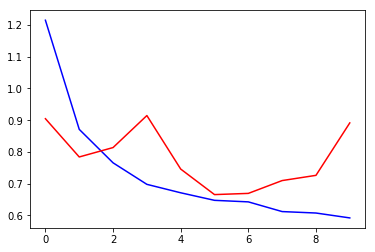

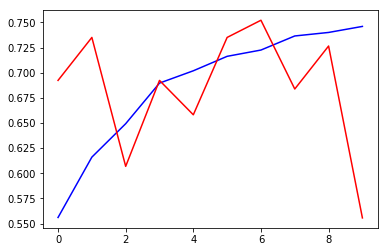

In [46]:
model.load_weights('set_a_weights.h5')
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()